# Geoinformática - Práctica 9
## Difusión Espacial - Modelo de Hägerstrand
## Parte 2 - Análisis de Datos

En esta segunda parte, se utilizarán algunas de las herramientas del Análisis Exploratorio de Datos Espaciales (*ESDA*, por sus siglas en inglés), como las aprendidas en la [práctica de Autocorrelación Espacial](../05_autocorrelacion/05_autocorrelacion.html), sobre los datos generados por el Modelo de Hägerstrand, con el objetivo de comprender cuál es la relación entre algunos Estadísticos Espaciales y las Distribuciones observadas a través del modelo.

Para esto, nuevamente se hará uso de las herramientas proporcionadas por la librería `pysal`; específicamente, el calculo de la *I de Moran* que, como ya se ha estudiado, se trata de un estadístico que permite medir la *Autocorrelación Espacial Global* de las entidades. Para comenzar con el análisis utilizando este estadístico, se comenzará con la Difusión Aleatoria:

Populating the interactive namespace from numpy and matplotlib
acabé
Hay 21695 adoptantes de un total de 50000 habitantes
El total de iteraciones realizadas es 15


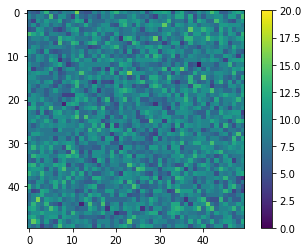

In [1]:
# Importación de librerias
%pylab inline
from haggerstrand.diffusion import SimpleDiffusion

# Instanciar la clase
r = SimpleDiffusion(N=50 , M=50 , mif_size=9 , pob=20 , initial_diff=[(20,20)] , p0=0.3 , max_iter=15)

# Generación del modelo de Difusión Aleatoria
r.random_diffusion()

# Obtención de gráfica
img_r = plt.imshow(r.result[: , : , r.max_iter - 1] , vmin = 0 , vmax = 20)
plt.colorbar(img_r)
plt.show()

Ahora, es posible calcular la *I de Moran* utilizando `pysal`; para repasar cómo obtener éste estadístico, revisa nuevamente la [práctica de Autocorrelación Espacial](../05_autocorrelacion/05_autocorrelacion.html), específicamente, en la sección titulada *Autocorrelación Espacial Global*:

In [2]:
# Importación de 'pysal'
import pysal as ps

# Generación de Matriz de Pesos Espaciales
m_reina = ps.lib.weights.lat2W(nrows = r.N , ncols = r.M , rook = False)

# Cálculo de I de Moran
moran_r = ps.explore.esda.Moran(r.result[: , : , r.max_iter - 1].flatten() , m_reina)

/home/datalab/miniconda3/envs/geoinf/lib/python3.7/site-packages/pysal/explore/segregation/network/network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
/home/datalab/miniconda3/envs/geoinf/lib/python3.7/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


Los pasos realizados en la celda anterior son los siguientes:
1. En la Línea 2, se importa la librería 'pysal', tal y como se han importado otras librerías.
2. En la Línea 5, la Matriz de Pesos Espaciales se calcula a través de una nueva función, llamada `.lat2W()`; ésta calcula la matriz utilizando como base una topología regular, como es el espacio creado en la clase `SimpleDiffusion` compuesto por celdas idénticas, y al que se le coloca el número de filas (`N`) y columnas (`M`) de este espacio. El argumento `rook` únicamente define si la Matriz de Contigüidad seguirá el criterio de Torre (`True`) o de Reina (`False`).
3. Por último, en la Línea 8, se utiliza la ya conocida función `.Moran()`, colocando como argumento la línea `r.result[: , : , r.max_iter - 1]` que llama la última *rebanada* de la Matriz de Resultados, y a la cual se le aplica la función `.flatten()` para convertir la matriz en una lista (*Array*), que es la forma en la que necesita ser ingresada en `.Moran()`.

Pueden llamarse las propiedades de la variable `moran` para obtener los resultados del análisis:

In [3]:
print("La I de Moran es " + str(moran_r.I))
print("El valor esperado, bajo la suposición de normalidad, es " + str(moran_r.EI))
print("La significancia es de " + str(moran_r.p_sim))

La I de Moran es 0.008837227171271693
El valor esperado, bajo la suposición de normalidad, es -0.00040016006402561027
La significancia es de 0.176


¿Cómo se interpretan los valores anteriores?

Realizando el mismo ejercicio para el caso de la Difusión Espacial, se tiene:

acabé
Hay 9554 adoptantes de un total de 50000 habitantes
El total de iteraciones realizadas es 15


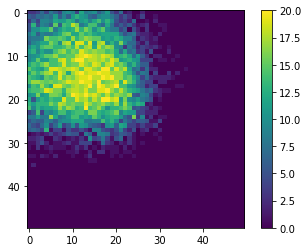

La I de Moran es 0.9465848485987758
El valor esperado, bajo la suposición de normalidad, es -0.00040016006402561027
La significancia es de 0.001


In [4]:
# Instanciar la clase
s = SimpleDiffusion(N=50 , M=50 , mif_size=9 , pob=20 , initial_diff=[(20,20)] , p0=0.3 , max_iter=15)

# Generación del modelo de Difusión Espacial
s.spatial_diffusion()

# Obtención de gráfica
img_s = plt.imshow(s.result[: , : , s.max_iter - 1] , vmin = 0 , vmax = 20)
plt.colorbar(img_s)
plt.show()

# Cálculo de I de Moran
moran_s = ps.explore.esda.Moran(s.result[: , : , s.max_iter - 1].flatten() , m_reina)

print("La I de Moran es " + str(moran_s.I))
print("El valor esperado, bajo la suposición de normalidad, es " + str(moran_s.EI))
print("La significancia es de " + str(moran_s.p_sim))

Puede observarse que la *I de Moran* no sólo tiene un valor mucho más grande en la Difusión Espacial a comparación de la Difusión Aleatoria, sino también es mucho más significativa. Éste es justo el resultado esperado pues, debido a que los resultados del Modelo de Hägerstrand dependen de la distancia entre las celdas, los datos comienzan a asemejarse a las Vecindades, lo cual inmediatamente genera una Autocorrelación Espacial Positiva.

#### Ejercicio
Experimenta con los diferentes parámetros del algoritmo, determinados al momento de instanciar la clase `SimpleDiffusion`, y observa cómo se modifica la *I de Moran*. Determina, ¿cuál es el parámetro más importante?

En el siguiente ejemplo, se disminuye el Número de Iteraciones (`max_iter`) para el algoritmo de Difusión Espacial:

acabé
Hay 868 adoptantes de un total de 50000 habitantes
El total de iteraciones realizadas es 10


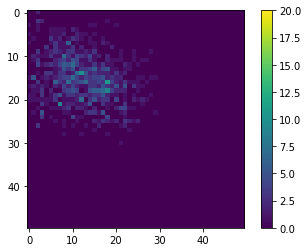

La I de Moran es 0.582654181913133
El valor esperado, bajo la suposición de normalidad, es -0.00040016006402561027
La significancia es de 0.001


In [5]:
# Instanciar la clase
s = SimpleDiffusion(N=50 , M=50 , mif_size=9 , pob=20 , initial_diff=[(20,20)] , p0=0.3 , max_iter=10)

# Generación del modelo de Difusión Espacial
s.spatial_diffusion()

# Obtención de gráfica
img_s = plt.imshow(s.result[: , : , s.max_iter - 1] , vmin = 0 , vmax = 20)
plt.colorbar(img_s)
plt.show()

# Cálculo de I de Moran
moran_s = ps.explore.esda.Moran(s.result[: , : , s.max_iter - 1].flatten() , m_reina)

print("La I de Moran es " + str(moran_s.I))
print("El valor esperado, bajo la suposición de normalidad, es " + str(moran_s.EI))
print("La significancia es de " + str(moran_s.p_sim))

___
### Difusión Mixta
Aunque los modelos anteriores ayudan a visualizar perfectamente el fenómeno de difusión desde el punto de vista teórico, en la realidad es difícil observar fenómenos de difusión tan *puros* como el de Difusión Espacial. Para esto, la librería también posee el método `.mixed_diffusion()`, que pretende mezclar los dos tipos de difusión estudiados hasta ahora (Aleatoria y Espacial) a través de una proporción:

acabé
Hay 21068 adoptantes de un total de 50000 habitantes
El total de iteraciones realizadas es 15


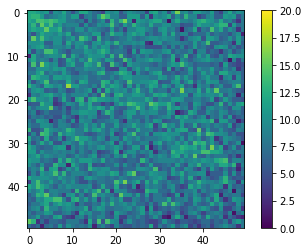

In [6]:
# Instanciar la clase
m = SimpleDiffusion(N=50 , M=50 , mif_size=9 , pob=20 , initial_diff=[(20,20)] , p0=0.3 , max_iter=15)

# Generación del modelo de Difusión Mixta (Proporción del 50%)
m.mixed_diffusion(0.5)

# Obtención de gráfica
img_m = plt.imshow(m.result[: , : , m.max_iter - 1] , vmin = 0 , vmax = 20)
plt.colorbar(img_m)
plt.show()

Al colocar un valor dentro de la función `.mixed_diffusion()`, en este caso 0.5, se le menciona al algoritmo que la mitad de la difusión se realice de acuerdo al Modelo de Hägerstrand, mientras que la otra mitad la realice aleatoriamente; como tal, si la proporción es de 0, el fenómeno se vuelve completamente Aleatorio y, si se hace 1, es completamente Espacial. Calculando la *I de Moran* con esta Difusión Mixta:

In [7]:
# Cálculo de I de Moran
moran_m = ps.explore.esda.Moran(m.result[: , : , m.max_iter - 1].flatten() , m_reina)

print("La I de Moran es " + str(moran_m.I))
print("El valor esperado, bajo la suposición de normalidad, es " + str(moran_m.EI))
print("La significancia es de " + str(moran_m.p_sim))

La I de Moran es 0.08344378448273654
El valor esperado, bajo la suposición de normalidad, es -0.00040016006402561027
La significancia es de 0.001


#### Ejercicio
Experimenta con los diferentes valores de la proporción, así como los parámetros del propio algoritmo.